In [26]:

import matplotlib.pyplot as plt
import pandas as pd

from bq.queries import run_query

In [46]:
# GDelt project
events = pd.DataFrame(
	run_query(
		"""
		select eventcode, nummentions, avgtone, goldsteinscale, sqldate
		from `gdelt-bq.gdeltv2.events` 
		order by rand()
		limit 500000
		""",
		debug=True
	)
)

# Remove rows with date older than 1970
events = events[events['sqldate'] > 19700000]

events.head(n=20)

Running query: select eventcode, nummentions, avgtone, goldsteinscale, sqldate from `gdelt-bq.gdeltv2.events` order by rand() limit 500000
Request already cached, returning cached data.


,eventcode,nummentions,avgtone,goldsteinscale,sqldate
0,013,2,-3.003337,0.4,20171009
1,060,5,-1.362089,6.0,20160513
2,110,10,-0.788955,-2.0,20190831
3,046,10,-0.151515,7.0,20240228
4,043,1,-5.916031,2.8,20180917
5,010,10,-2.617801,0.0,20200106
6,173,2,-6.464646,-5.0,20230513
7,012,1,-1.856764,-0.4,20170215
8,120,3,-2.507375,-4.0,20210628
9,020,2,-0.912779,3.0,20180128


In [47]:
# { event_code: event_name }
event_codes = pd.read_json('../data/cameo_mapping.json', orient='index')
event_codes = event_codes.rename(columns={0: 'description'})
event_codes = event_codes.reset_index().rename(columns={'index': 'eventcode'})

events['eventcode'] = events['eventcode'].astype(str)
event_codes['eventcode'] = event_codes['eventcode'].astype(str)

In [30]:
event_codes.head(n=20)

,EventCode,Description
0,1,MAKE PUBLIC STATEMENT
1,10,"Make statement, not specified below"
2,11,Decline comment
3,12,Make pessimistic comment
4,13,Make optimistic comment
5,14,Consider policy option
6,15,Acknowledge or claim responsibility
7,16,Deny responsibility
8,17,Engage in symbolic act
9,18,Make empathetic comment


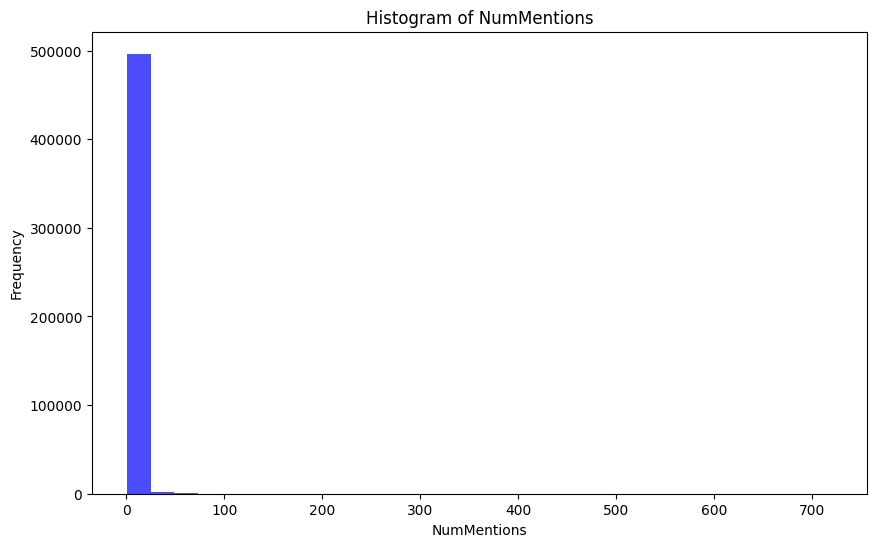

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(events['nummentions'], bins=30, color='blue', alpha=0.7)
plt.xlabel('NumMentions')
plt.ylabel('Frequency')
plt.title('Histogram of NumMentions')
plt.show()

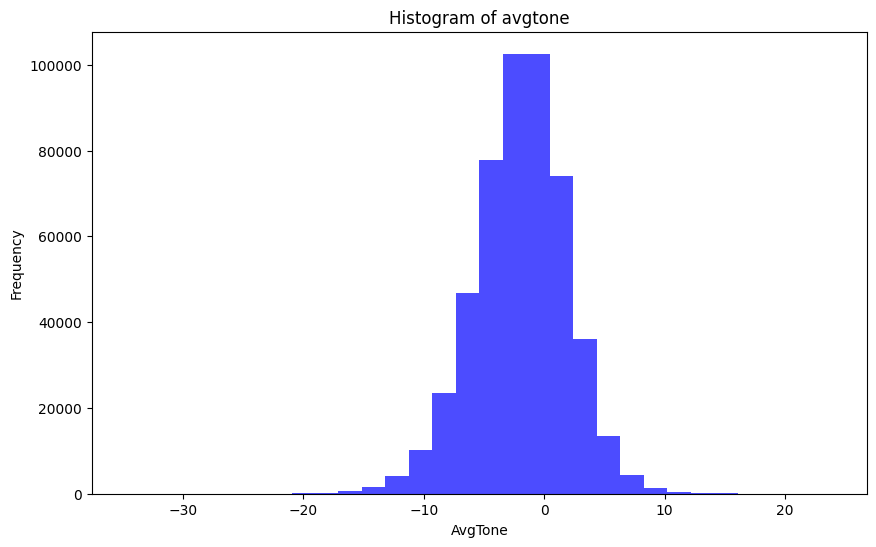

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(events['avgtone'], bins=30, color='blue', alpha=0.7)
plt.xlabel('AvgTone')
plt.ylabel('Frequency')
plt.title('Histogram of avgtone')
plt.show()

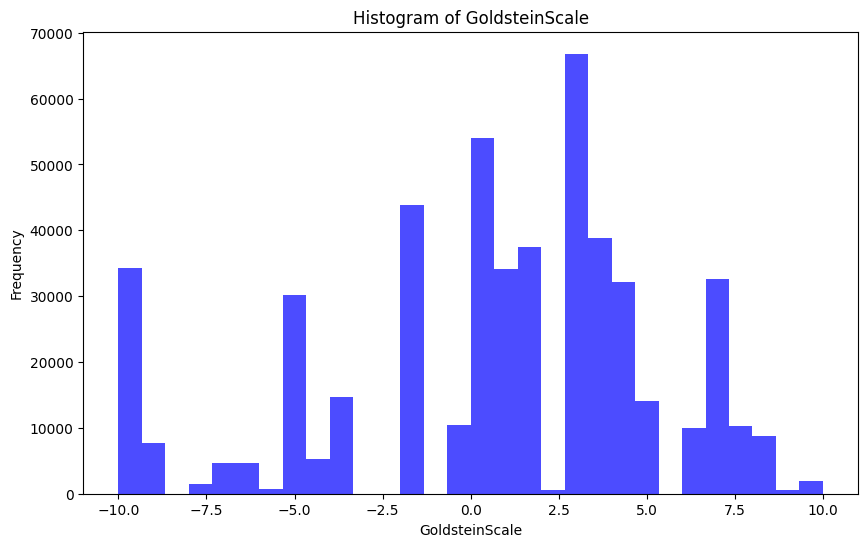

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(events['goldsteinscale'], bins=30, color='blue', alpha=0.7)
plt.xlabel('GoldsteinScale')
plt.ylabel('Frequency')
plt.title('Histogram of GoldsteinScale')
plt.show()

In [52]:
# Group by eventcode and sum the GoldsteinScale
events_grouped = events.groupby('eventcode')['goldsteinscale'].sum().reset_index()
events_grouped = events_grouped.sort_values('goldsteinscale', ascending=False)
events_grouped

,eventcode,goldsteinscale
64,046,116088.000000
66,051,97903.000006
61,043,96552.399995
10,020,94212.000000
54,036,84148.000000
...,...,...
214,180,-33183.000000
141,120,-42180.000000
229,193,-68890.000000
211,173,-71865.000000


In [55]:
events['eventcode'] = events['eventcode'].astype(str).str.lstrip('0')
# Merge with event_codes to get the description
events_grouped = events_grouped.merge(event_codes, on='eventcode', how='left')
# filter out events_grouped without Description
events_grouped = events_grouped[events_grouped['description'].notnull()]
events_grouped

,eventcode,goldsteinscale,description_x,description_y,description
99,1232,-4.0,Reject request for policy change,Reject request for policy change,Reject request for policy change
100,1234,-4.0,"Reject request for change in institutions, regime","Reject request for change in institutions, regime","Reject request for change in institutions, regime"
101,1051,-5.0,Demand easing of administrative sanctions,Demand easing of administrative sanctions,Demand easing of administrative sanctions
102,1042,-5.0,Demand policy change,Demand policy change,Demand policy change
103,126,-5.0,Reject mediation,Reject mediation,Reject mediation
...,...,...,...,...,...
231,180,-33183.0,"Use unconventional violence, not specified below","Use unconventional violence, not specified below","Use unconventional violence, not specified below"
232,120,-42180.0,"Reject, not specified below","Reject, not specified below","Reject, not specified below"
233,193,-68890.0,Fight with small arms and light weapons,Fight with small arms and light weapons,Fight with small arms and light weapons
234,173,-71865.0,"Arrest, detain, or charge with legal action","Arrest, detain, or charge with legal action","Arrest, detain, or charge with legal action"


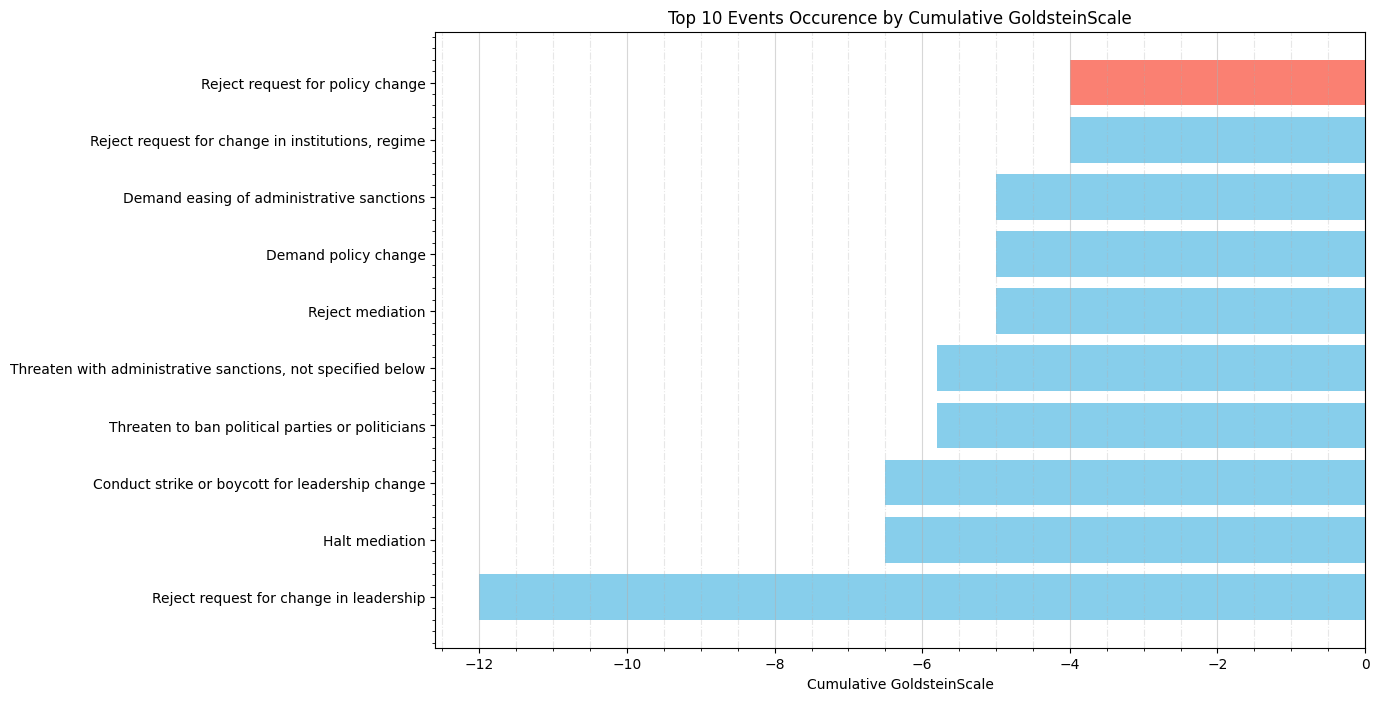

In [57]:
# Sort by GoldsteinScale and get the top 10 events
top_events = events_grouped.nlargest(10, 'goldsteinscale')

# Plot the results
plt.figure(figsize=(12, 8))
plt.barh(top_events['description'], top_events['goldsteinscale'], color='skyblue')
plt.xlabel('Cumulative GoldsteinScale')
plt.title('Top 10 Events Occurence by Cumulative GoldsteinScale')
plt.gca().invert_yaxis()  # Invert y axis to have the highest value at the top
plt.grid(axis='x', linestyle='-.', alpha=0.3, which='minor')  # Add gridlines
plt.grid(axis='x', linestyle='-', alpha=0.5, which='major')  # Add gridlines
plt.minorticks_on()  # Add minor ticks
# Highlight the bars with the highest value
plt.gca().patches[0].set_facecolor('salmon')
plt.show()

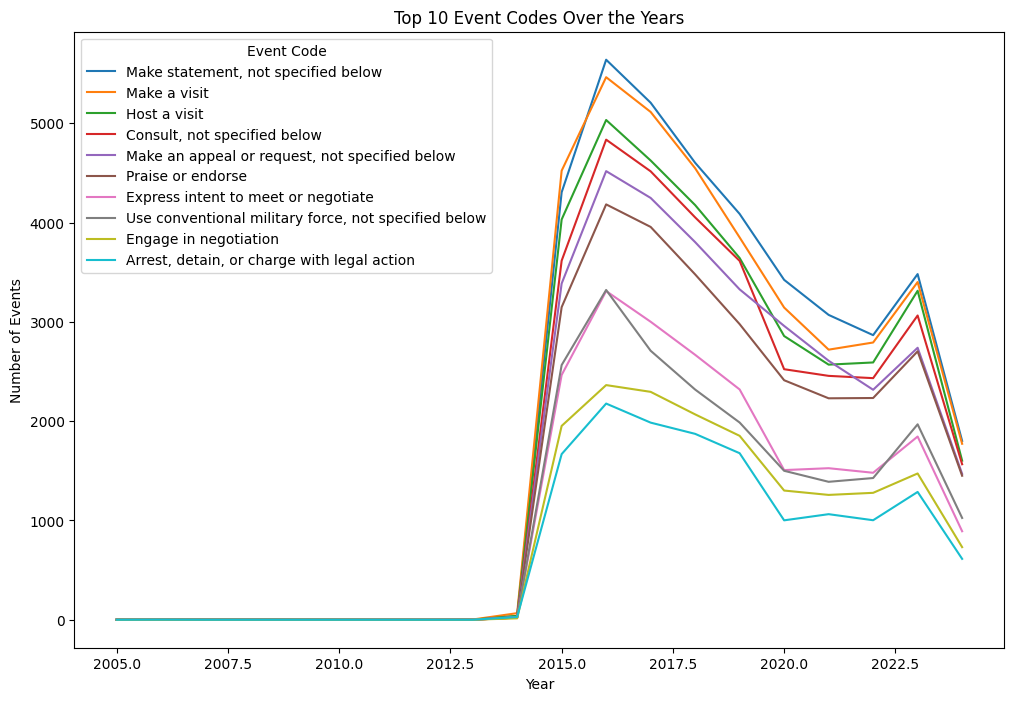

In [58]:
# Show a plot showing 10 lines : one for each of the top 10 events each year
# Get the top 10 events more present in the dataset, do not use GoldsteinScale
top_events = events['eventcode'].value_counts().nlargest(10).index

# Filter events to include only top 10 event codes
filtered_events = events[events['eventcode'].isin(top_events)].copy()

# Extract year from SQLDATE
filtered_events['year'] = filtered_events['sqldate'].astype(str).str[:4].astype(int)

# Group by year and event code, then count occurrences
event_counts = filtered_events.groupby(['year', 'eventcode']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(12, 8))
for event_code in top_events:
	# do not show number of events, but quantity of events
	label = event_codes[event_codes['eventcode'] == event_code]['description'].values[0]
	fraction = event_counts[event_code] / event_counts.sum(axis=1)
	plt.plot(event_counts.index, event_counts[event_code], label=label)

plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.title('Top 10 Event Codes Over the Years')
plt.legend(title='Event Code')
plt.show()